# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = "8e0c33f0275874016933c37946cb8134"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=narsaq
Processing Record 2 of Set 1 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=saint%20george
Processing Record 3 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=saint-philippe
Processing Record 4 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=ushuaia
Processing Record 5 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=hithadhoo
Processing Record 6 of Set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=bambous%20vi

Processing Record 2 of Set 2 | salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=salta
Processing Record 3 of Set 2 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=ostrovnoy
Processing Record 4 of Set 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=taolanaro
City not found. Skipping...
Processing Record 5 of Set 2 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=naze
Processing Record 6 of Set 2 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=tsihombe
City not found. Skipping...
Processing Record 7 of Set 2 | ndola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=ndola
Processing Record 8 of Set 2 | mar del plata
htt

Processing Record 5 of Set 3 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=srednekolymsk
Processing Record 6 of Set 3 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=avarua
Processing Record 7 of Set 3 | nurota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=nurota
Processing Record 8 of Set 3 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=nikolskoye
Processing Record 9 of Set 3 | dalvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=dalvik
Processing Record 10 of Set 3 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=hobart
Processing Record 11 of Set 3 | arlit
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 8 of Set 4 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=porto%20novo
Processing Record 9 of Set 4 | muncar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=muncar
Processing Record 10 of Set 4 | iztapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=iztapa
Processing Record 11 of Set 4 | las palmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=las%20palmas
Processing Record 12 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=khatanga
Processing Record 13 of Set 4 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=lorengau
Processing Record 14 of Set 4 | lebu
http://api.openweathermap.org/data/2.5/weat

Processing Record 12 of Set 5 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=coquimbo
Processing Record 13 of Set 5 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=geraldton
Processing Record 14 of Set 5 | maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=maceio
Processing Record 15 of Set 5 | loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=loandjili
Processing Record 16 of Set 5 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=omboue
Processing Record 17 of Set 5 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=tasiilaq
Processing Record 18 of Set 5 | bahay
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 16 of Set 6 | nagato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=nagato
Processing Record 17 of Set 6 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=adrar
Processing Record 18 of Set 6 | san jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=san%20jose
Processing Record 19 of Set 6 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=muros
Processing Record 20 of Set 6 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=kangaatsiaq
Processing Record 21 of Set 6 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=kaeo
Processing Record 22 of Set 6 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 19 of Set 7 | berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=berdigestyakh
Processing Record 20 of Set 7 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=attawapiskat
City not found. Skipping...
Processing Record 21 of Set 7 | praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=praya
Processing Record 22 of Set 7 | tygda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=tygda
Processing Record 23 of Set 7 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=vila%20franca%20do%20campo
Processing Record 24 of Set 7 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=umzimvubu
City not found. 

Processing Record 23 of Set 8 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=rio%20gallegos
Processing Record 24 of Set 8 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=cap%20malheureux
Processing Record 25 of Set 8 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=ancud
Processing Record 26 of Set 8 | mutsamudu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=mutsamudu
City not found. Skipping...
Processing Record 27 of Set 8 | carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=carballo
Processing Record 28 of Set 8 | krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=krasnyy%20chikoy
Processing Record 29

Processing Record 26 of Set 9 | ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=ambulu
Processing Record 27 of Set 9 | dangriga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=dangriga
Processing Record 28 of Set 9 | alekseyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=alekseyevka
Processing Record 29 of Set 9 | ocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=ocos
Processing Record 30 of Set 9 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=qaqortoq
Processing Record 31 of Set 9 | aras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=aras
Processing Record 32 of Set 9 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 29 of Set 10 | yushala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=yushala
Processing Record 30 of Set 10 | labutta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=labutta
City not found. Skipping...
Processing Record 31 of Set 10 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=anadyr
Processing Record 32 of Set 10 | strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=strezhevoy
Processing Record 33 of Set 10 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=whitehorse
Processing Record 34 of Set 10 | zaraza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=zaraza
Processing Record 35 of Set 10 | gouyave
http://api.

City not found. Skipping...
Processing Record 32 of Set 11 | la romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=la%20romana
City not found. Skipping...
Processing Record 33 of Set 11 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=chagda
City not found. Skipping...
Processing Record 34 of Set 11 | kribi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=kribi
City not found. Skipping...
Processing Record 35 of Set 11 | nandyal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=nandyal
City not found. Skipping...
Processing Record 36 of Set 11 | bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e0c33f0275874016933c37946cb8134&q=bintulu
City not found. Skipping...
Processing Record 37 of Set 11 | trud
http://api.openweathermap.org/data

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          515
Cloudiness    515
Country       515
Date          515
Humidity      515
Lat           515
Lng           515
Max Temp      515
Wind Speed    515
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,narsaq,32,GL,1524711000,63,60.91,-46.05,30.20,1.61
1,saint george,0,GR,1524711000,76,39.45,22.34,55.40,5.82
2,saint-philippe,90,CA,1524710700,93,45.36,-73.48,53.60,8.05
3,ushuaia,75,AR,1524708000,100,-54.81,-68.31,35.60,6.93
4,hithadhoo,44,MV,1524712720,100,-0.60,73.08,83.49,11.23


## Latitude vs Temperature Plot

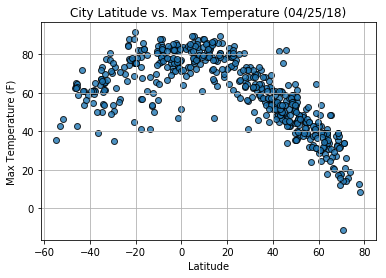

In [8]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

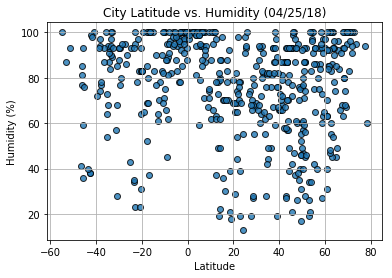

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

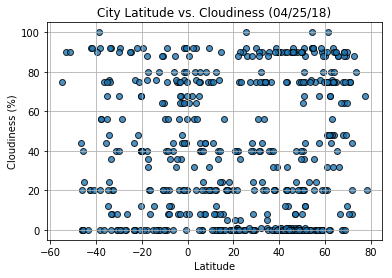

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

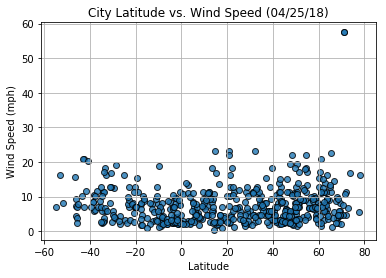

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()